In [1]:
# Data storage and RNG
import numpy as np

# Interpolation
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d

# Plotting
GOLDEN = (1 + 5 ** 0.5) / 2
import matplotlib.pyplot as plt
%matplotlib inline

# Numerical tools
from scipy import integrate
from math import sqrt

In [2]:
# Make setting
p1 = (0, 0)
p2 = (1, np.random.uniform(-1,0))

In [62]:
class DNA():
    """A class holding the function and geneology of a path."""
    
    def __init__(self, external_genes=None, mutation_rate=0.1):
        
        # Make a path 
        if external_genes == None:
            path = self.generate_path(p1, p2)
        else:
            path = external_genes
        
        # Assign the x-coords, y-coods, and function as attributes
        self.x = path[0]
        self.y = path[1]
        self.f2 = path[2]
        
        # Constants
        self.mutation_rate = mutation_rate
        
        # Geneology
        self.parent_A = path[3]
        self.parent_B = path[4]        
    
    def generate_path(self, p1, p2):
        """Returns a path for the particle to follow."""

        # Seperate x's and y's
        x = [p[0] for p in [p1,p2]]
        y = [p[1] for p in [p1,p2]]

        # Linearly interpolate the two points
        f = interp1d(x, y, kind='linear')

        # Make the domain
        x = np.linspace(0,1,11)
        y = []

        # Fill in the range
        for coord in x:

            # Bound the curve at the two points p1 and p2
            if (coord == min(x)):
                y.append(p1[1])
            elif (coord == max(x)):
                y.append(p2[1])

            # For every point excluding the boundary, add uniform noise
            else:
                y.append(f(coord) + np.random.uniform(-2, f(coord)))

        # Iterpolate the data (x, y) to create the path
        f2 = UnivariateSpline(x, y, k=4, s=0)

        # Return x-coords, y-coords, and interpolated function    
        return x, y, f2, None, None
    
    
    def reproduction(self, partner):
        """Returns a genetic offspring of two paths."""
        
        # Create empty array for the child's y-path
        child_y = [0] * (len(self.y) - 2)
        
        # Create the child's y-path
        for i in range(len(child_y)):
            if i < int(round((len(self.y)-1)/2)):
                child_y[i] = self.y[i+1]
            else:
                child_y[i] = partner.y[i+1]
            
            if 1 == 2:
                for i in range(len(child_y)):
                    # If the random float is less than the mutation rate, then that y-coord is random
                    if np.random.uniform(0, 1) < self.mutation_rate:
                        child_y[i] = np.random.uniform(-2, -0.1)

        child_y.insert(0, 0)
        child_y.insert(-1, self.y[-1])
                
        # Mutate the child's y-path
        for i in range(len(child_y)):
            # If the random float is less than the mutation rate, then that y-coord is random
            if np.random.uniform(0, 1) < self.mutation_rate:
                child_y[i] = np.random.uniform(0, -0.1)
                
        # Return the interpolated child path
        x = np.linspace(0,1,26)
        y = child_y
        f2 = UnivariateSpline(x, y, k=4, s=0)
        child = [x, y, f2, self, partner]

        return child

In [63]:
class Path():
    """A class holding the attributes of an individual path."""
    
    def __init__(self, external_DNA=None):
        """Initialize the class."""
        
        # Make a path 
        if external_DNA == None:
            self.dna = DNA()
        else:
            self.dna = external_DNA
        
    
    def evaluate(self):
        """Returns the inverse time required to traverse a path and error estimation."""
        
        # Differential time as a function of x
        dt = lambda x: sqrt( (1 + self.dna.f2.derivative()(x)**2) / (-self.dna.f2(x)) )
        
        # Integrate dt over the domain [0,1]
        try: 
            T = integrate.quad(dt, a=0, b=1, limit=250)
            T_inv = T[0] ** (-1)
            err = T[1]
            self.valid = True
            
        except: 
            # Exception occurs if f(x)>0 for x in [0,1]
            T = np.inf
            T_inv = T ** (-1)
            err = 0
            self.valid = False
            
        return T_inv, err
    
    def visualize(self, title=None):
        """Returns a plot of the interpolated path."""
        
        # A more granular domain
        xnew = np.linspace(0,1,1001)
        
        # Plot setup
        plt.plot(self.dna.x, self.dna.y, 'o',         # Original points
                 xnew, self.dna.f2(xnew), '--',       # Interpolated path
                 xnew, [0]*len(xnew),                 # Cutoff line at y=0
                 xnew, interp1d([p1[0],p2[0]],        # Linear
                                [p1[1],p2[1]], 
                                kind='linear')(xnew)
                )
        # Plot titles
        if title != None:
            plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
        
        # Render
        plt.show()

(0.09513457487598764, 1.978541774860787e-09)


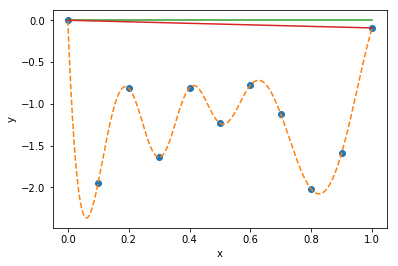

In [88]:
path = Path()
print(path.evaluate())
path.visualize()